In [1]:
# Data Sources
from fredapi import Fred

# Data Wrangling
import pandas as pd 
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

# Visuals 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Modeling 


# Set style 
plt.style.use('seaborn-v0_8-notebook')

# Pull Data from FRED API 

In [2]:
fred = Fred(api_key = 'd8c837149005fd272f94b30f77dad8fa')

In [3]:
# 10YT, monthly
t10yr = fred.get_series('DGS10', observation_start="2000-01-01", frequency='m')

In [4]:
# GDP, quarterly 
gdp = fred.get_series('GDP', observation_start="2000-01-01")

In [5]:
# CPI, monthly 
cpi = fred.get_series('CPALTT01USM657N', observation_start="2000-01-01")

In [6]:
# Unemployment, monthly 
unemp = fred.get_series('UNRATE', observation_start="2000-01-01")

In [7]:
# Deliquency Rate on Credit Card Loans, quarterly 
default = fred.get_series('DRCCLACBS', observation_start="2000-01-01")

In [8]:
# Retail Sales, monthly 
retail = fred.get_series('MRTSSM44000USS', observation_start="2000-01-01")

In [9]:
# PPI, monthly 
ppi = fred.get_series('PPIACO', observation_start="2000-01-01")

In [10]:
# Personal Savings, monthly
saving = fred.get_series('PSAVERT', observation_start="2000-01-01")

In [11]:
# Median Sales Price of Houses Sold, quarterly 
housing = fred.get_series('MSPUS', observation_start="2000-01-01")

In [12]:
# price of oil, monthly
oil = fred.get_series('DCOILWTICO', observation_start="2000-01-01", frequency='m')

# Disaggregate All Data to Monthly 

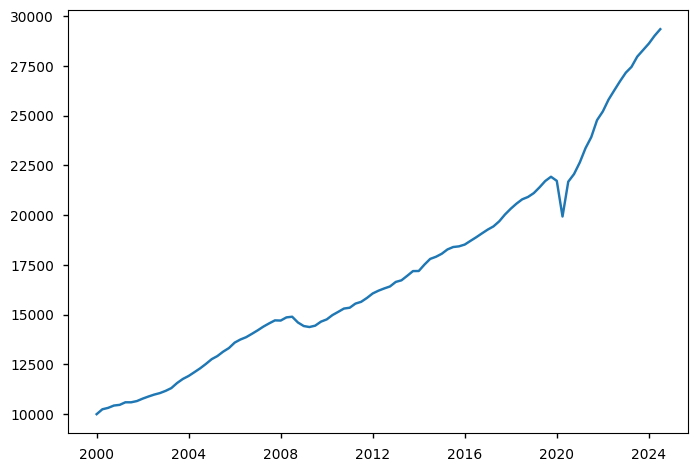

In [13]:
# Quarterly GDP 
plt.plot(gdp)

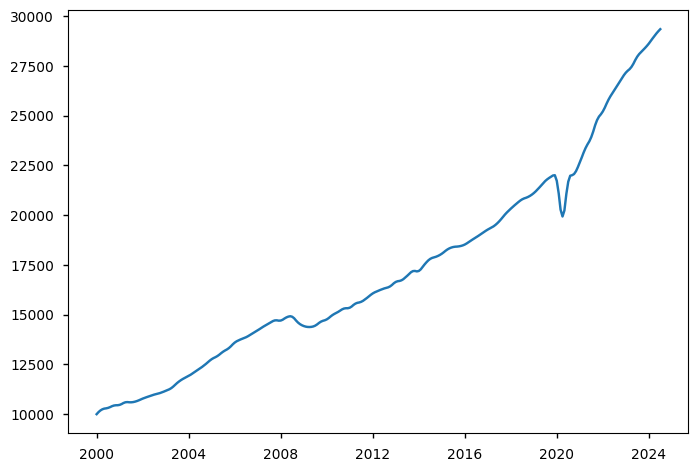

In [14]:
# interpolate to months
gdp = gdp.resample('MS').interpolate(method='spline', order=2)
plt.plot(gdp)

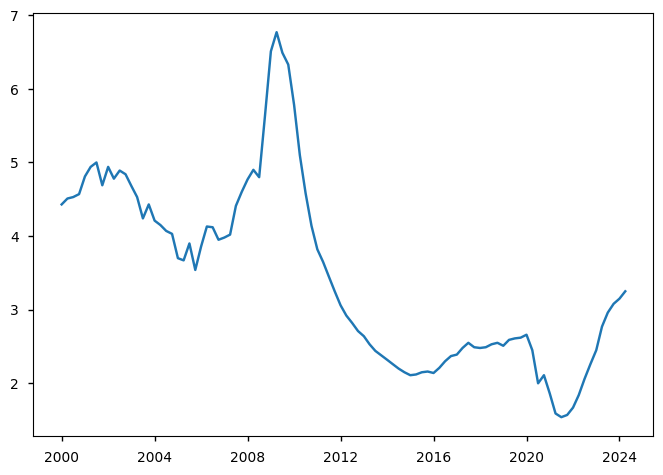

In [15]:
# credit deliquency, quarterly
plt.plot(default)

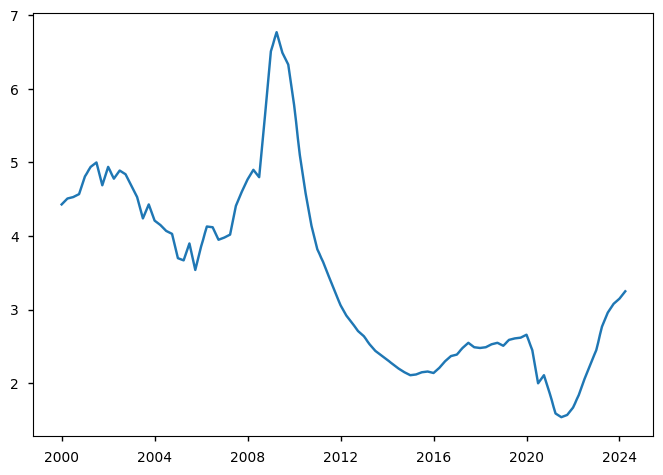

In [16]:
# interpolate to months
default = default.resample('MS').interpolate(method='linear', order=1)
plt.plot(default)

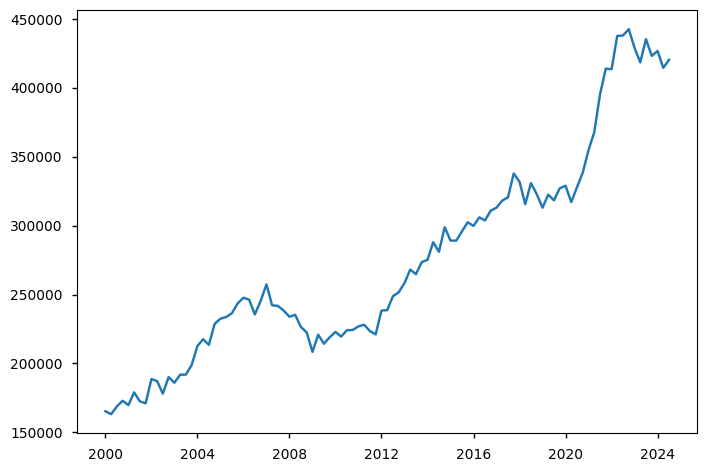

In [17]:
# housing, quarterly
plt.plot(housing)

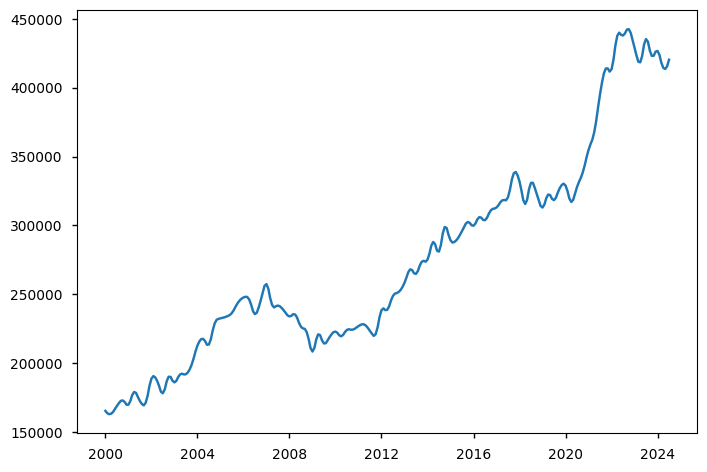

In [18]:
# interpolate to months
housing = housing.resample('MS').interpolate(method='spline', order=2)
plt.plot(housing)

# Combine into Single Data Frame

In [19]:
data = pd.DataFrame(t10yr)
data.columns = ['t10yr']

# convert index to datatime 
data.index = pd.to_datetime(data.index,format='%Y-%m-%d')

# fitler 
data = data.loc[data.index <= datetime(2024, 3, 1), :]

In [20]:
# gdp 
data = data.join(pd.DataFrame(gdp, columns=['gdp']))
# cpi 
data = data.join(pd.DataFrame(cpi, columns=['cpi']))
#unemp
data = data.join(pd.DataFrame(unemp, columns=['unemp']))
#default
data = data.join(pd.DataFrame(default, columns=['default']))
#retail
data = data.join(pd.DataFrame(retail, columns=['retail']))
#ppi
data = data.join(pd.DataFrame(ppi, columns=['ppi']))
#saving
data = data.join(pd.DataFrame(saving, columns=['saving']))
#housing
data = data.join(pd.DataFrame(housing, columns=['housing']))
#housing
data = data.join(pd.DataFrame(oil, columns=['oil']))

In [21]:
# create election year indicator 
years = [i for i in range(2000, 2025)]
elections = [1 if yr % 4 == 0 else 0 for yr in years]
election_yrs = pd.DataFrame(zip(years, elections), columns=['yr', 'election_ind'])

# join to data
#index = data.index
#data['yr'] = index.year
#data = data.merge(election_yrs, on='yr')
#data = data.drop('yr', axis=1)
#data.index = index

In [22]:
data.head()

,t10yr,gdp,cpi,unemp,default,retail,ppi,saving,housing,oil
2000-01-01,6.66,10002.179000,0.297089,4.0,4.430000,243436.0,128.3,4.5,165300.000000,27.26
2000-02-01,6.52,10110.170740,0.592417,4.1,4.456667,247133.0,129.8,4.0,163574.421372,29.37
2000-03-01,6.26,10188.369500,0.824499,4.0,4.483333,249825.0,130.8,3.8,162905.198575,29.84
2000-04-01,5.99,10247.720000,0.058411,3.8,4.510000,245831.0,130.7,4.3,163200.000000,25.72
2000-05-01,6.44,10280.930024,0.116754,4.0,4.516667,246201.0,131.6,4.3,164479.197948,28.79


- **Add description of each var**

In [23]:
data.describe()

,t10yr,gdp,cpi,unemp,default,retail,ppi,saving,housing,oil
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,3.254536,17064.755077,0.213456,5.743299,3.453986,376935.243986,186.117151,5.705155,272860.734921,63.265395
std,1.310895,4885.147193,0.388045,1.971517,1.254788,100333.558847,35.314999,3.250465,74288.059252,25.610256
min,0.620000,10002.179000,-1.915290,3.400000,1.540000,243436.000000,128.100000,1.400000,162905.198575,16.550000
25%,2.180000,13632.454494,-0.010197,4.300000,2.410000,302485.500000,163.350000,4.350000,221052.441609,42.655000
50%,3.170000,16124.439951,0.210194,5.200000,3.150000,352564.000000,190.900000,5.400000,248178.985104,61.630000
75%,4.245000,20260.250151,0.475215,6.650000,4.478333,431929.500000,203.150000,6.250000,318525.694086,82.760000
max,6.660000,28884.397247,1.373608,14.800000,6.770000,610060.000000,280.251000,32.000000,442600.000000,133.880000


In [24]:
data.isnull().sum()

t10yr      0
gdp        0
cpi        0
unemp      0
default    0
retail     0
ppi        0
saving     0
housing    0
oil        0
dtype: int64

In [25]:
data.dtypes

t10yr      float64
gdp        float64
cpi        float64
unemp      float64
default    float64
retail     float64
ppi        float64
saving     float64
housing    float64
oil        float64
dtype: object

# EDA

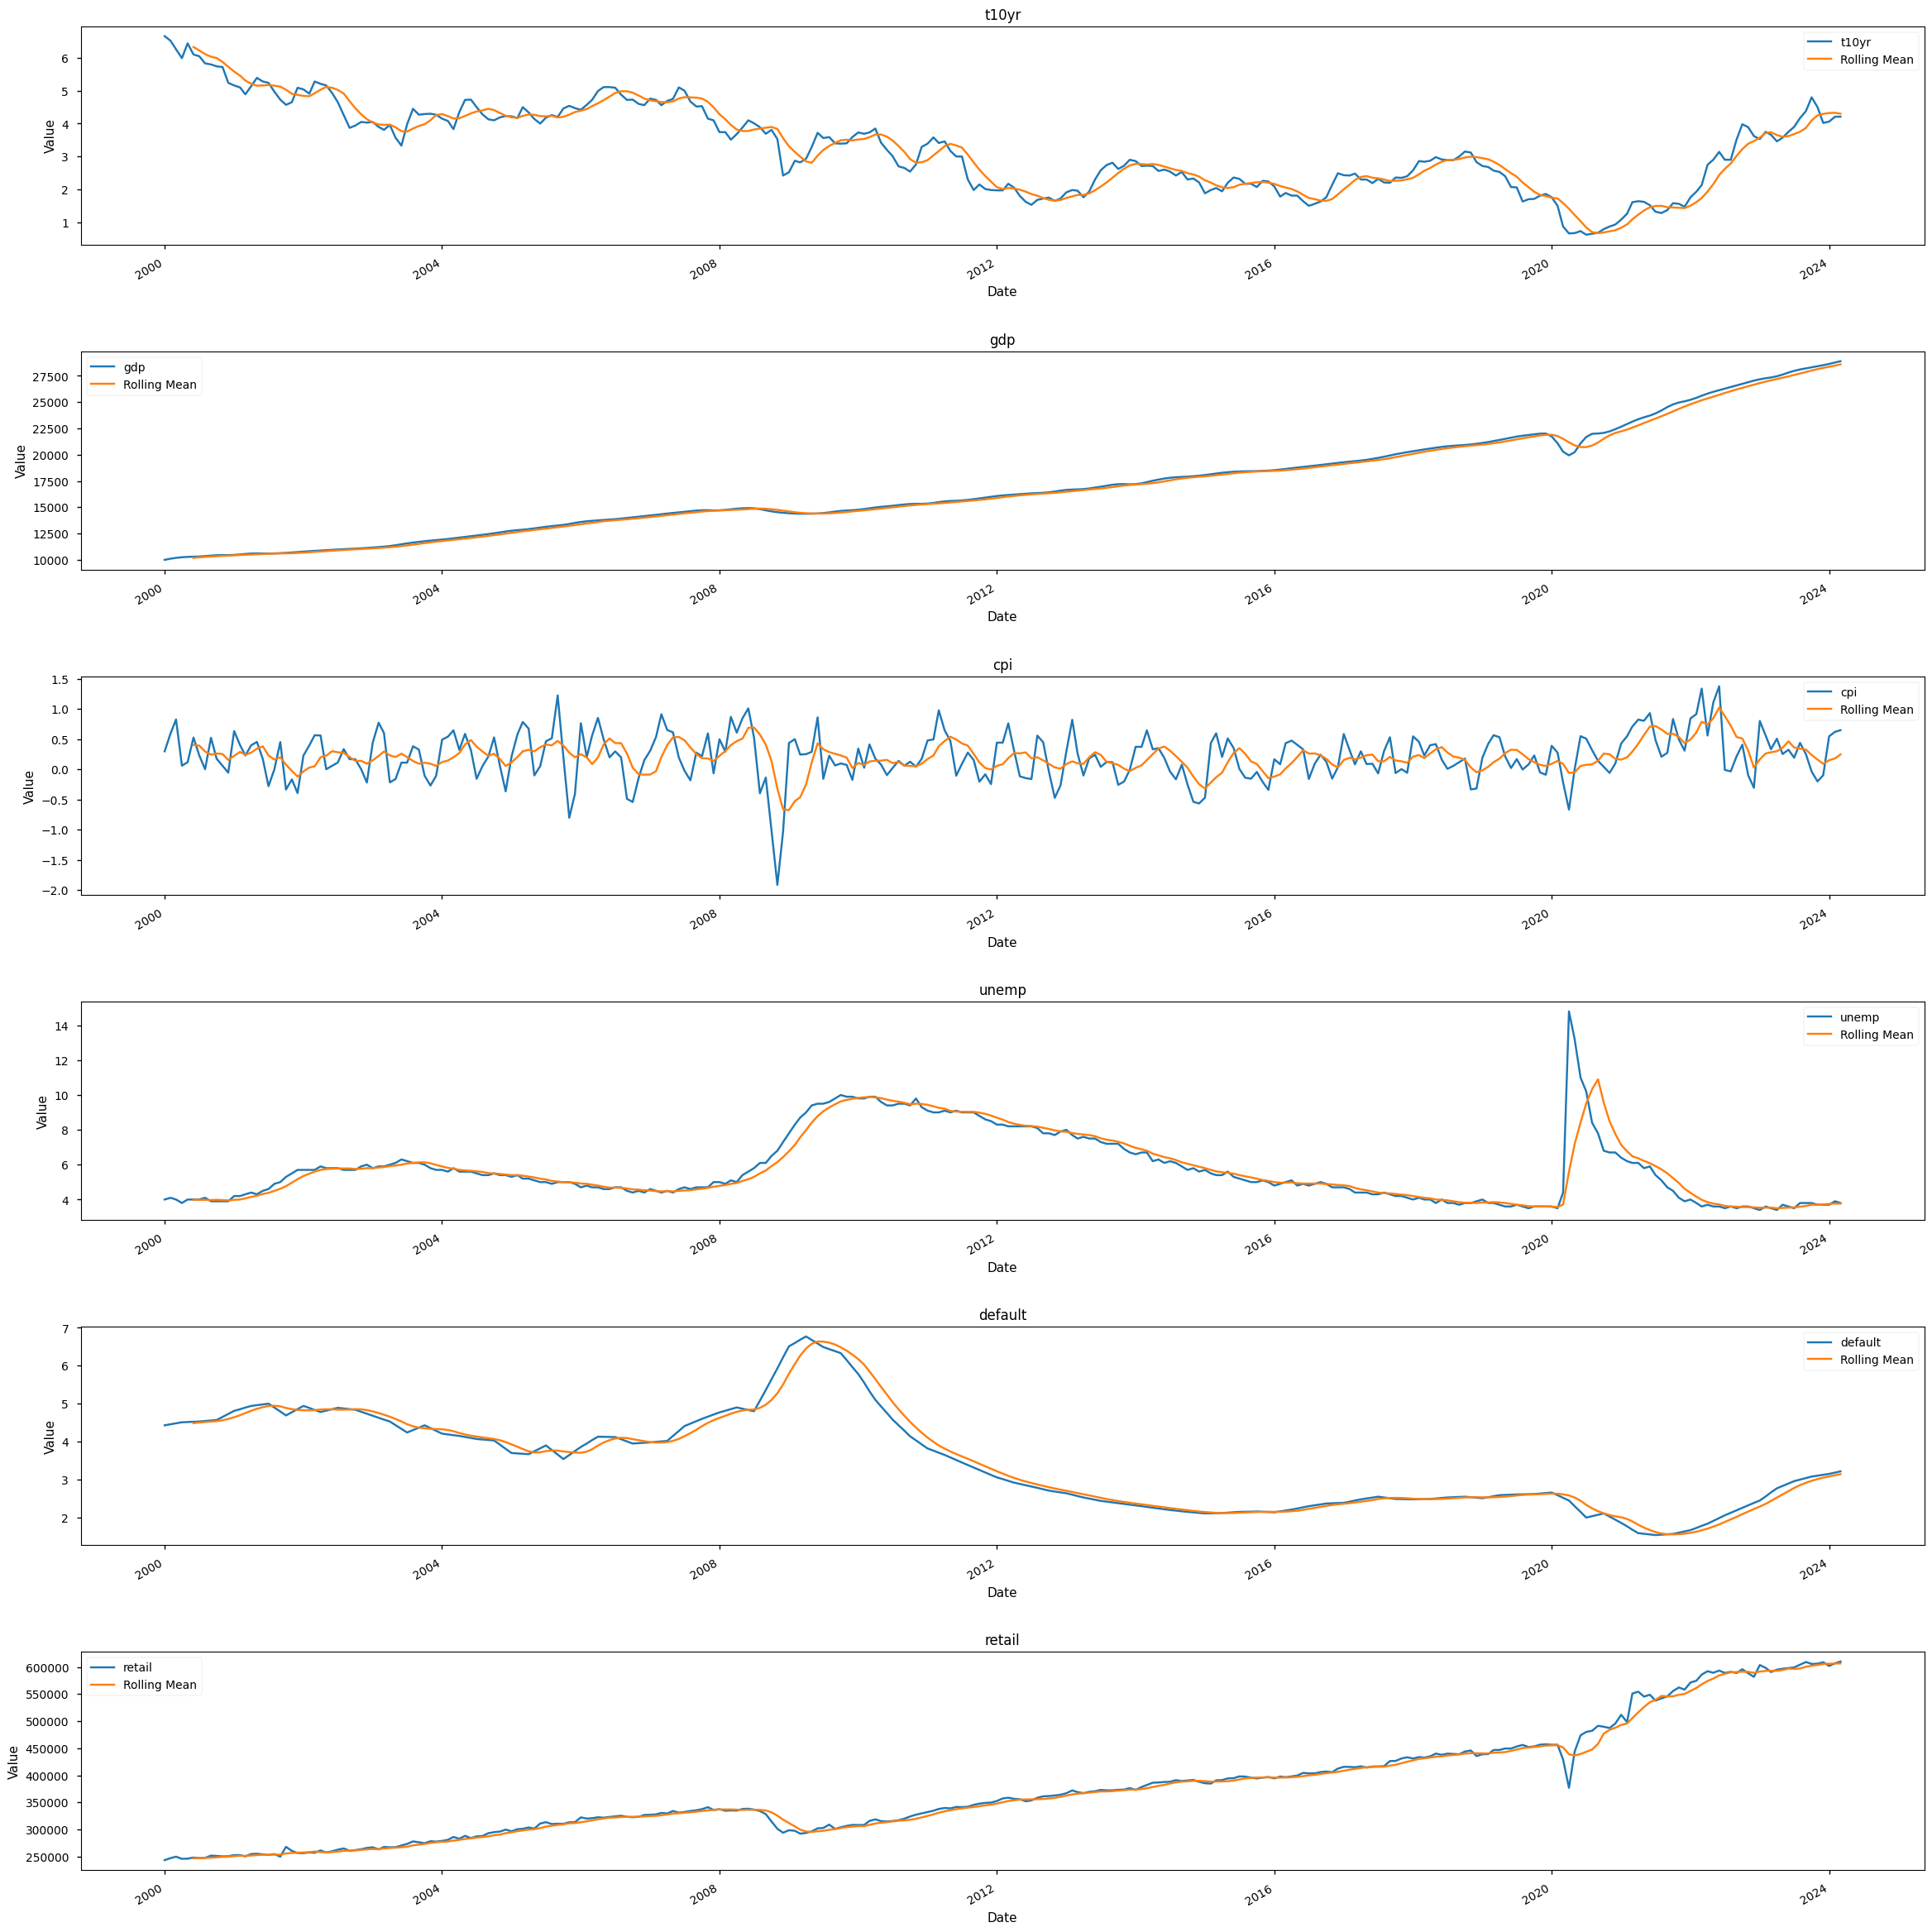

In [26]:
# line plots 
col_names = data.columns

fig = plt.figure(figsize=(24, 24))
for i in range(6):
  ax = fig.add_subplot(6,1,i+1)
  ax.plot(data.iloc[:,i],label=col_names[i])
  data.iloc[:,i].rolling(6).mean().plot(label='Rolling Mean')
  ax.set_title(col_names[i])
  ax.set_xlabel('Date')
  ax.set_ylabel('Value')
  plt.legend()
fig.tight_layout(pad=3.0)
plt.show()

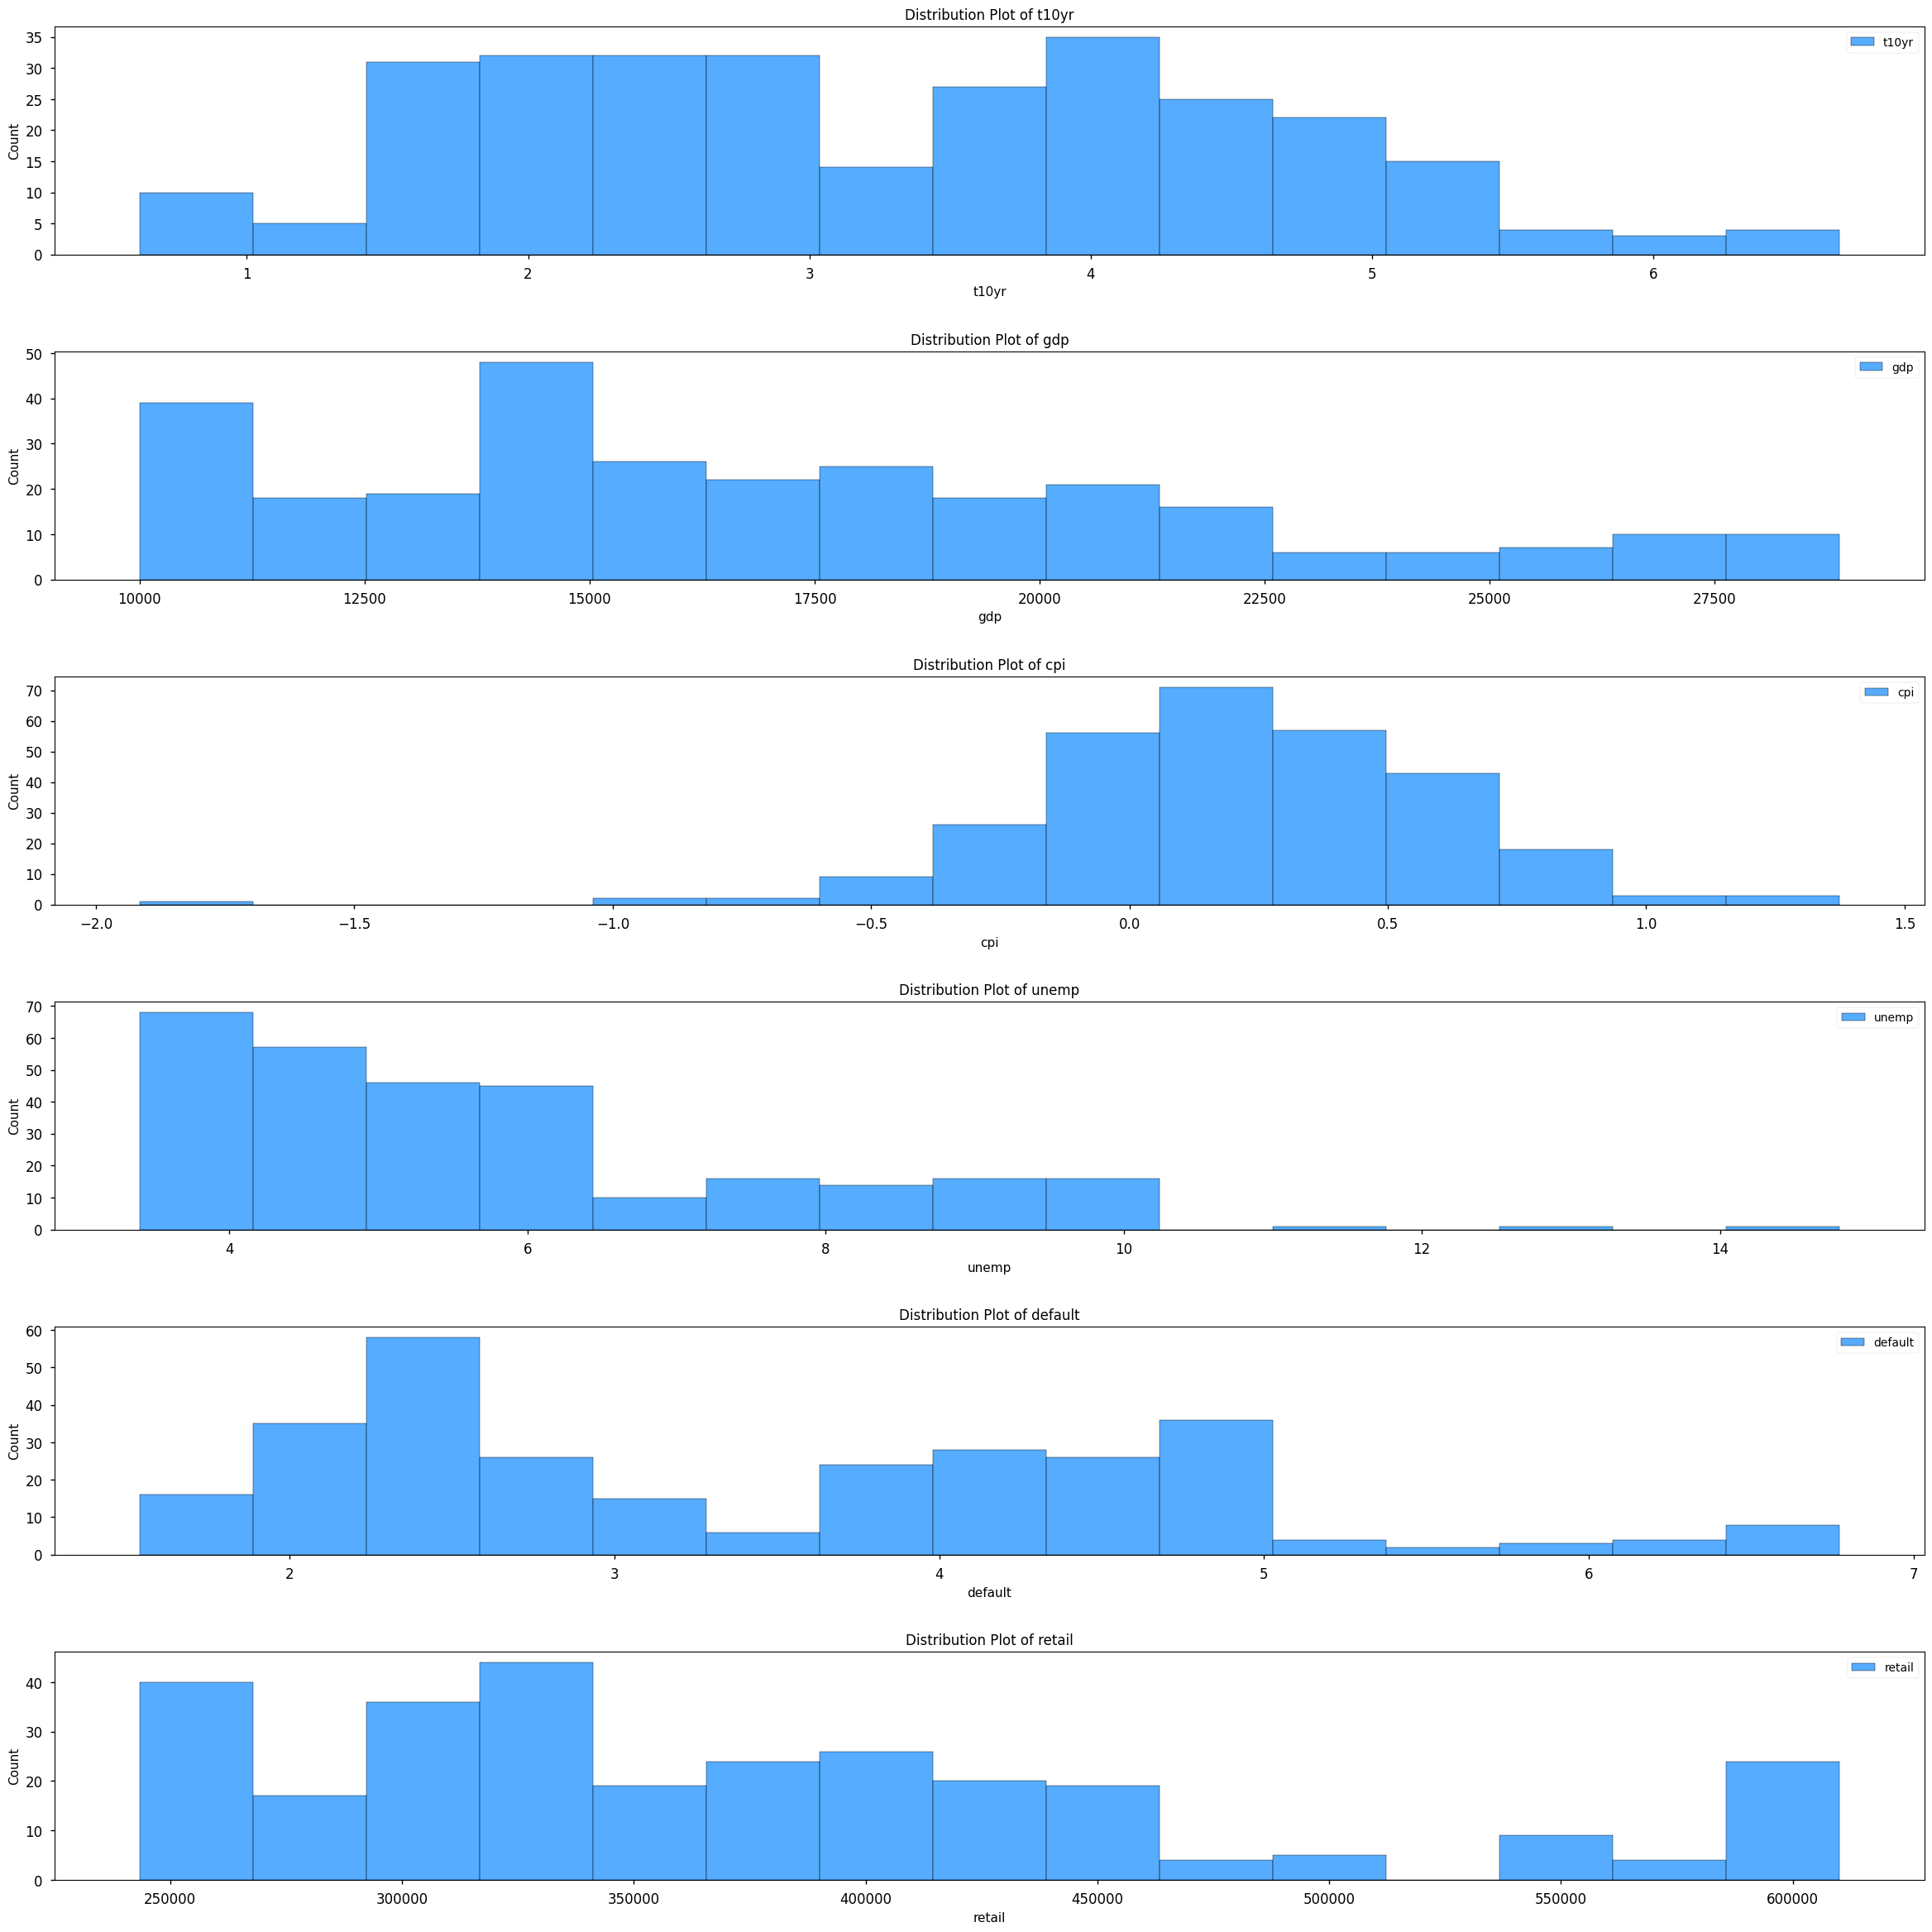

In [27]:
# distributions
fig = plt.figure(figsize=(24, 24))
col_names = data.columns
for i in range(6):
  ax = fig.add_subplot(6,1,i+1)
  sns.histplot(data.iloc[:,i],label=col_names[i],color='dodgerblue', bins=15).set_title("Distribution Plot of {}".format(col_names[i]),axes=ax)
  ax.tick_params(labelsize=12)
  plt.legend()
fig.tight_layout(pad=3.0)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Box Plot by Year 10YT')

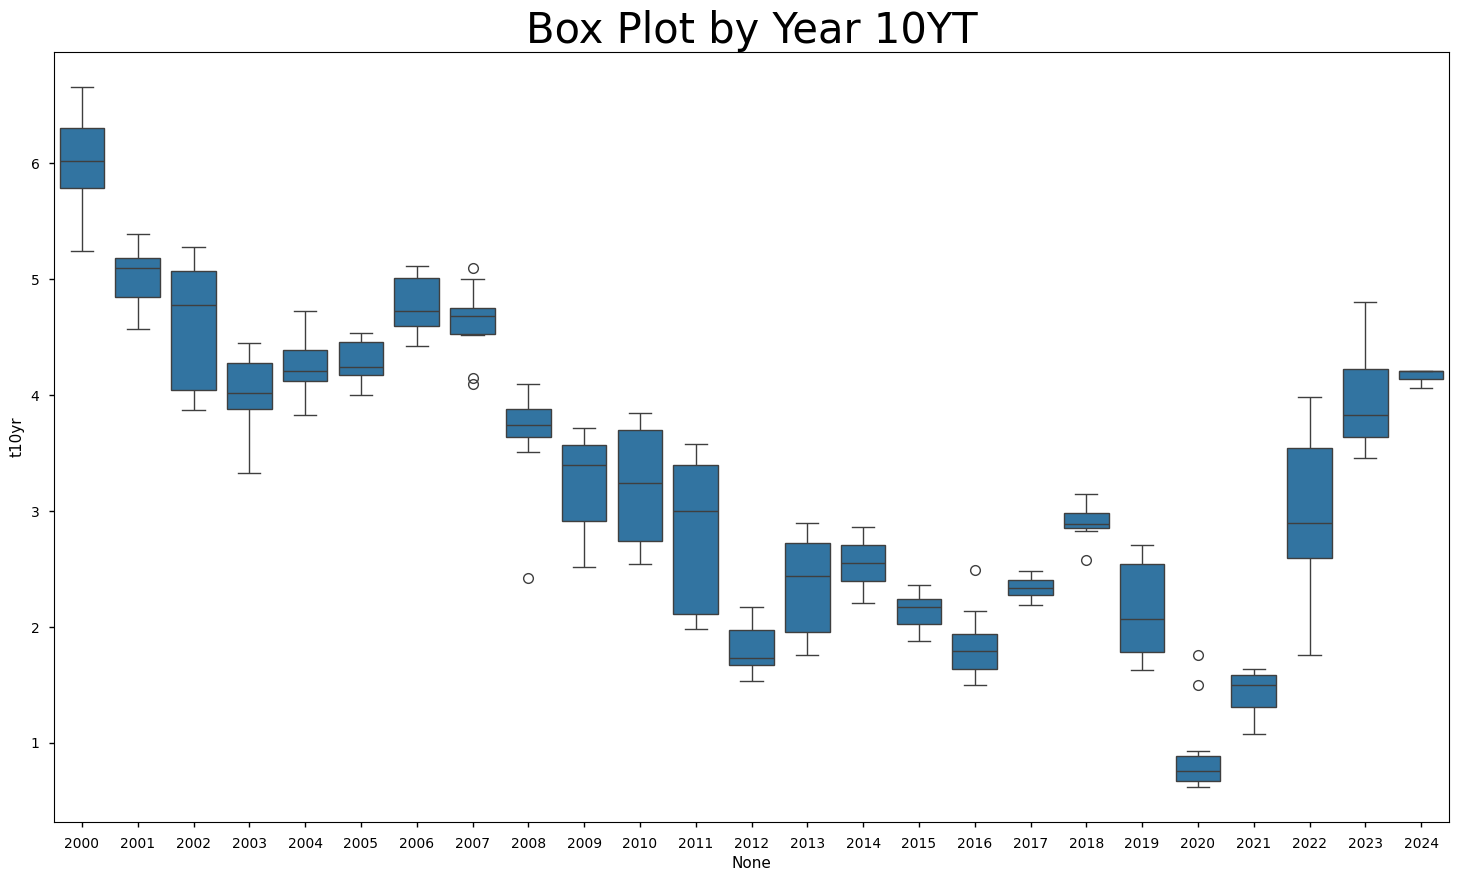

In [28]:
# box plot of monthly average 10YT 
plt.figure(figsize=(18,10))
ax = sns.boxplot(x=data.index.year, y=data['t10yr'])
ax.set_title('Box Plot by Year 10YT',fontsize=30)

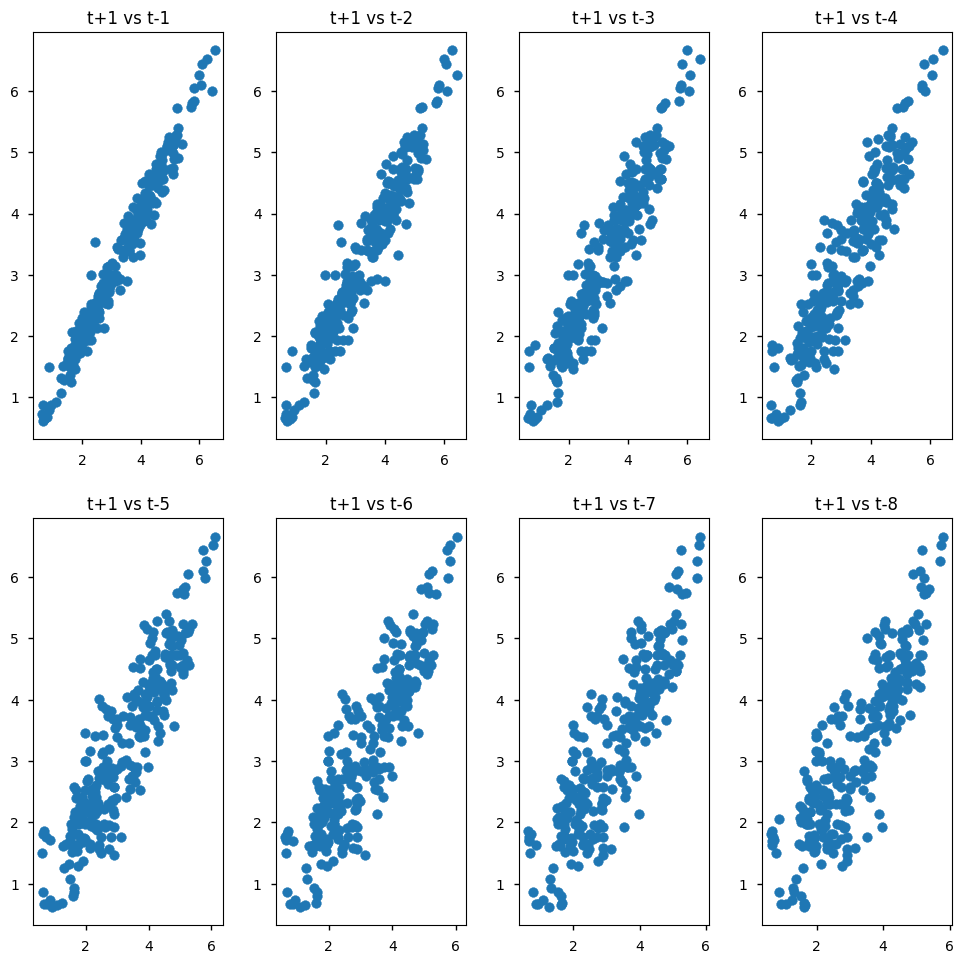

In [29]:
# lag plot to see autocorrelation 
plt.figure(figsize=(10,10))
t10yr = data['t10yr']
n_lags = 8
cols = [t10yr]

for i in range(1,(n_lags + 1)):
	cols.append(t10yr.shift(i))
df = pd.concat(cols, axis=1)
cols = ['t+1']
for i in range(1,(n_lags + 1)):
	cols.append('t-' + str(i))
df.columns = cols
plt.figure(1)
for i in range(1,(n_lags + 1)):
	ax = plt.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	plt.scatter(x=df['t+1'].values, y=df['t-'+str(i)].values)
plt.tight_layout(pad=2)
plt.show()

In [30]:
# scale data 
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

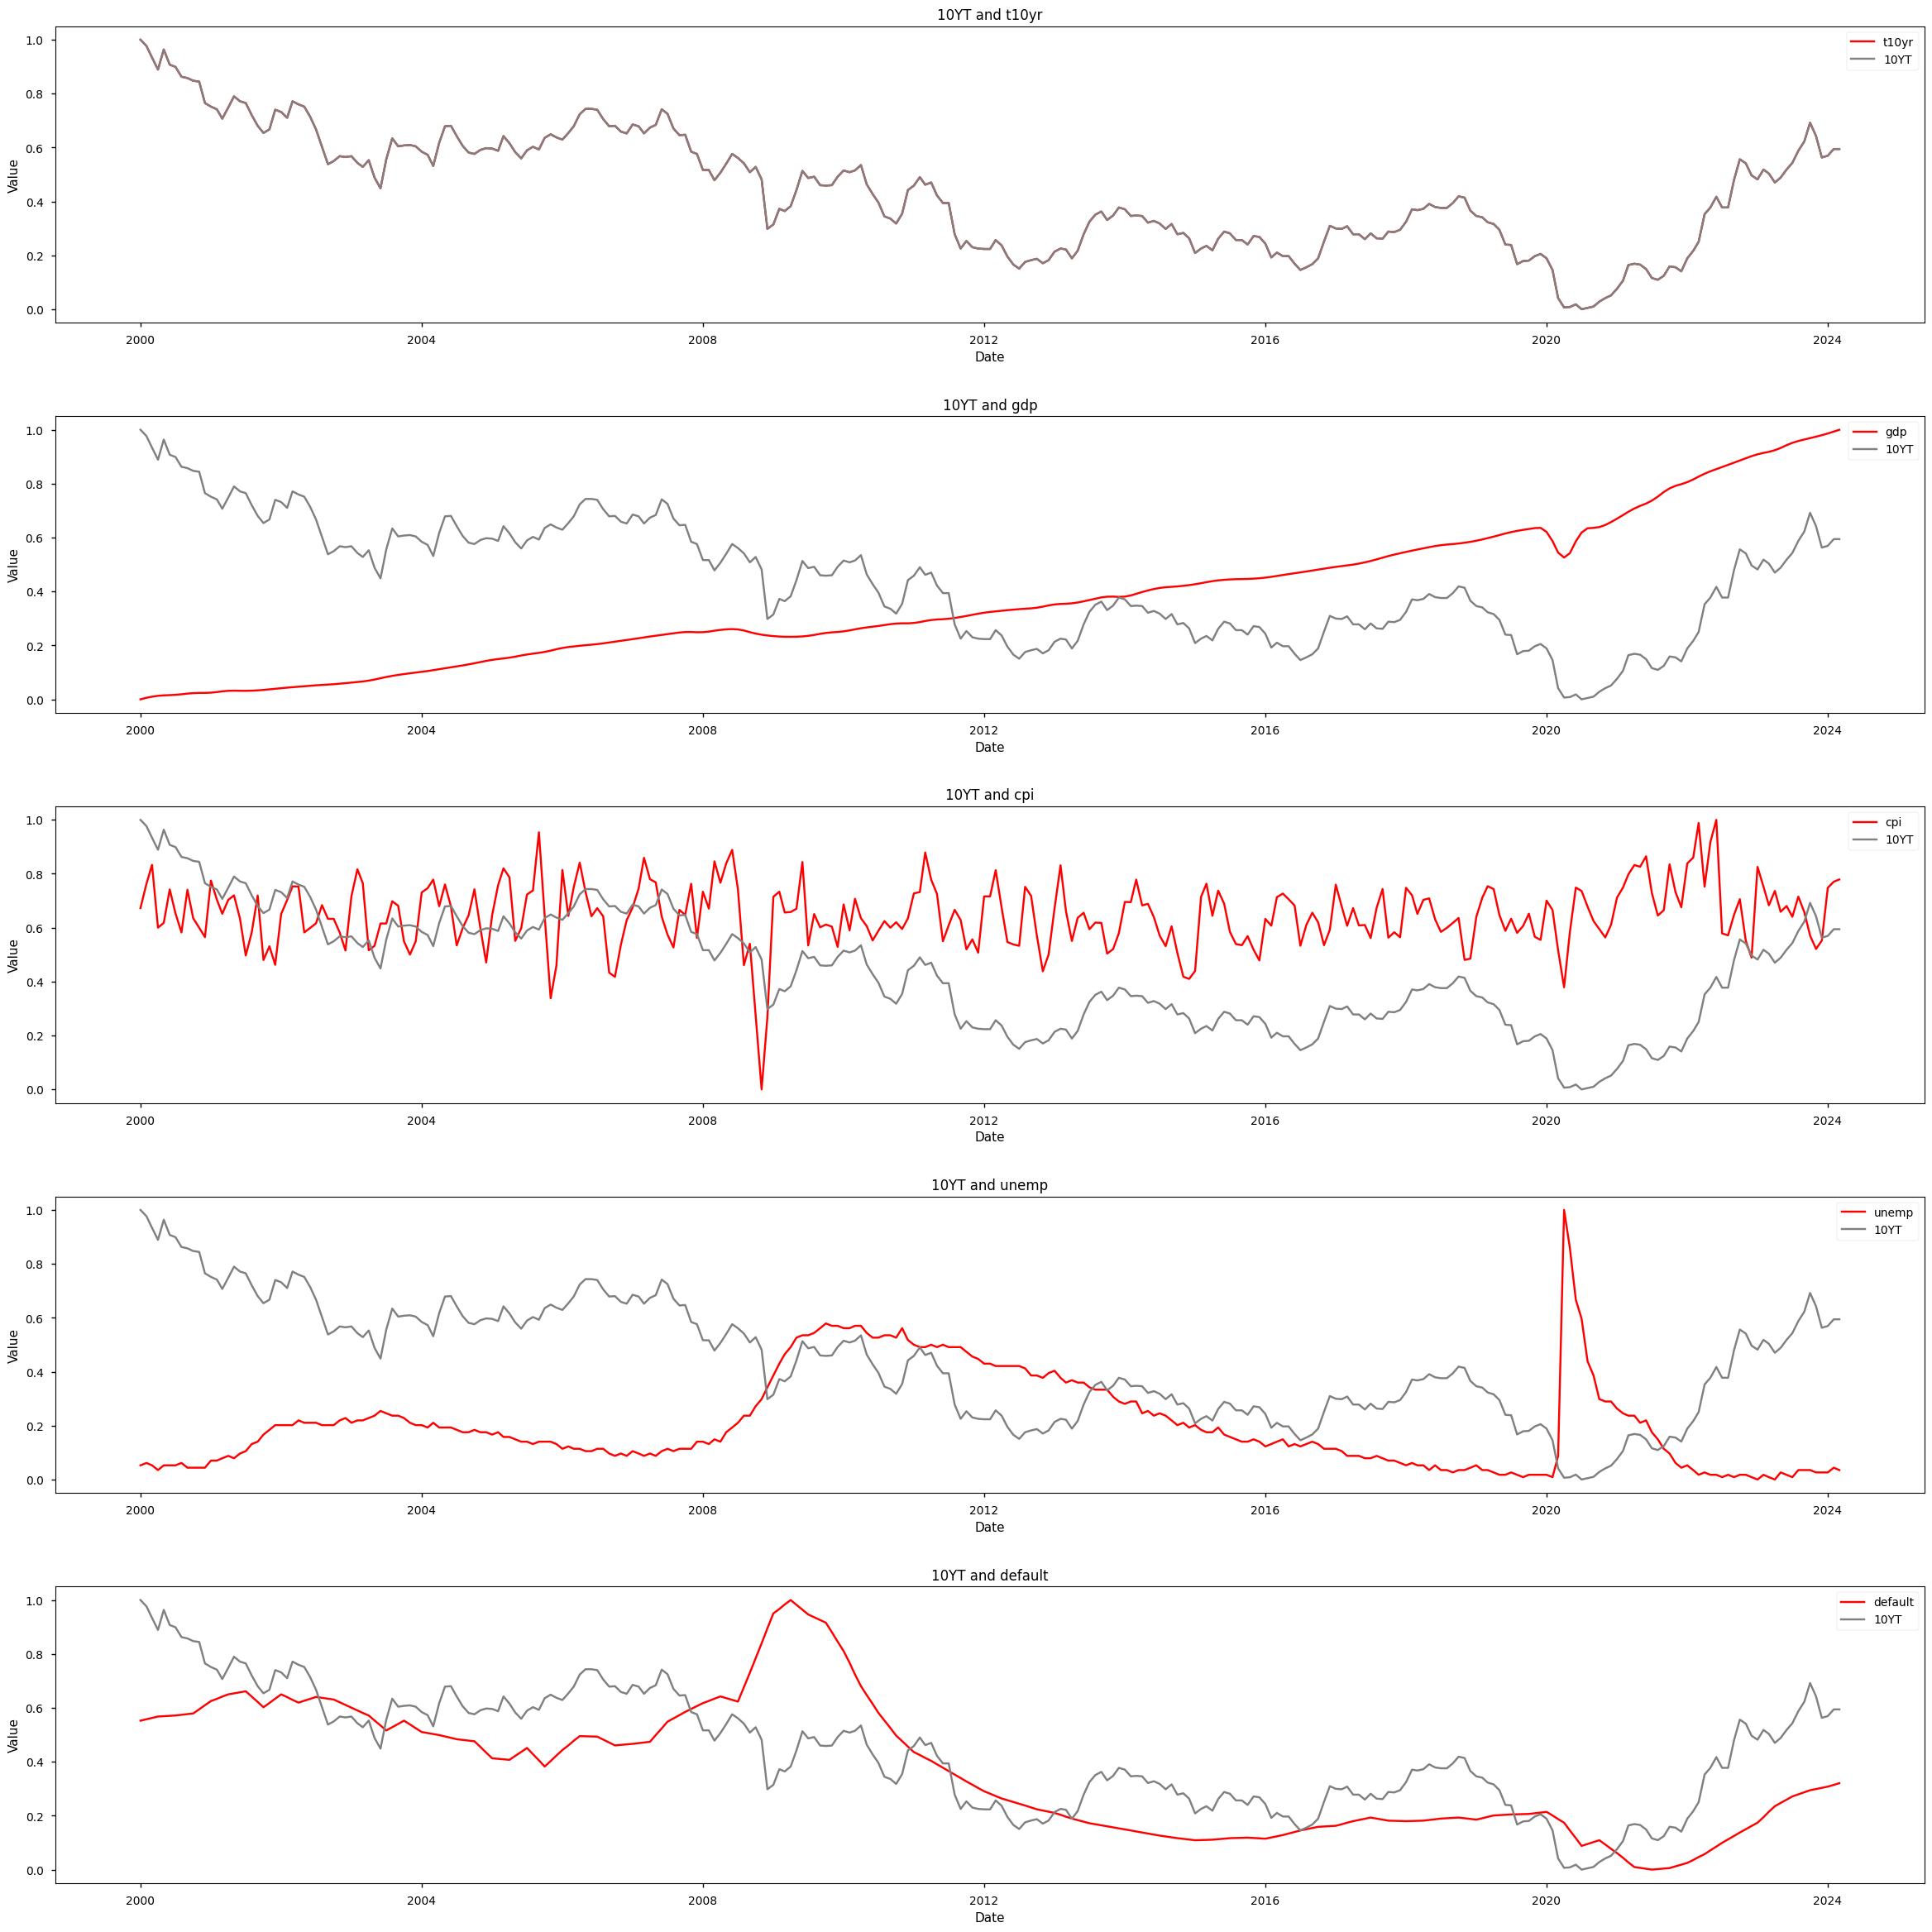

In [31]:
# compare 10YT and features 
col_names = data.columns
scaled_features = data_scaled
fig = plt.figure(figsize=(24, 24))
for i in range(5):
  ax = fig.add_subplot(5,1,i+1)
  ax.plot(data.index, scaled_features[:,i], label=col_names[i], c='red')
  ax.plot(data.index, data_scaled[:,0], label='10YT', c='grey')
  ax.set_title('10YT and ' + col_names[i])
  ax.set_xlabel('Date')
  ax.set_ylabel('Value')
  plt.legend()
fig.tight_layout(pad=3.0)
plt.show()

Text(0.5, 1.0, 'Heatmap Spearman Correlation')

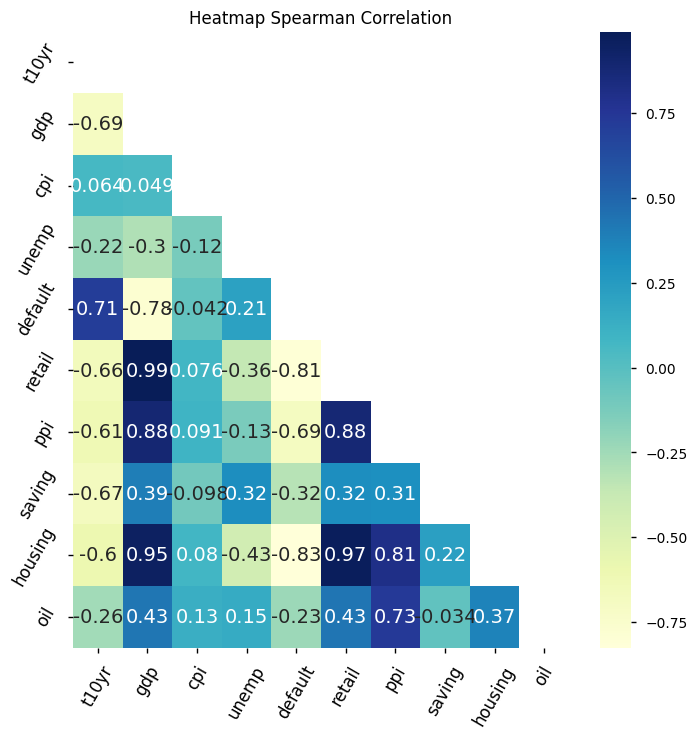

In [34]:
# correlation matrix 
data_scaled = pd.DataFrame(data_scaled, columns=col_names)
plt.figure(figsize=(8,8))
matrix = np.triu(data_scaled.corr(method='spearman'))
heat_map = sns.heatmap(data_scaled.corr(method='spearman'),annot=True,annot_kws={"size":14},cmap= 'YlGnBu',mask=matrix)
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=60)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=60)
plt.tick_params(labelsize=12)
plt.title('Heatmap Spearman Correlation')

Text(0.5, 1.0, 'Heatmap Spearman Correlation')

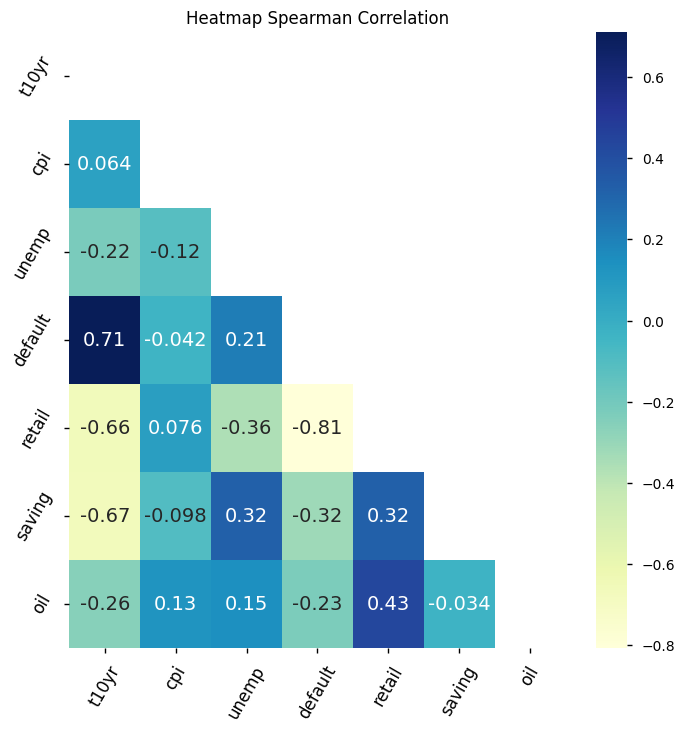

In [39]:
# drop gdp 
data_scaled = data_scaled.drop(['gdp', 'housing', 'ppi'], axis=1)
plt.figure(figsize=(8,8))
matrix = np.triu(data_scaled.corr(method='spearman'))
heat_map = sns.heatmap(data_scaled.corr(method='spearman'),annot=True,annot_kws={"size":14},cmap= 'YlGnBu',mask=matrix)
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=60)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=60)
plt.tick_params(labelsize=12)
plt.title('Heatmap Spearman Correlation')

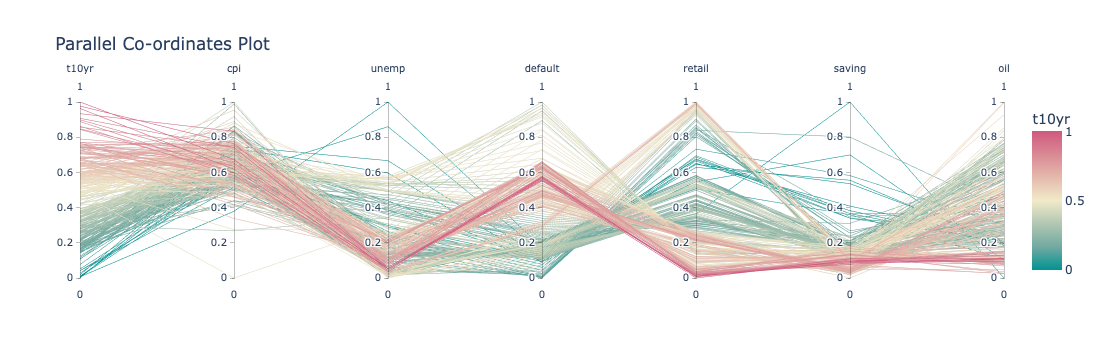

In [40]:
# parallel co-ordinates plot 
fig = px.parallel_coordinates(data_scaled, color='t10yr',color_continuous_scale=px.colors.diverging.Tealrose,
                              title='Parallel Co-ordinates Plot')

fig.show()